In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')

In [2]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


In [3]:
df = pd.get_dummies(df,columns=['origin'])
y = df['mpg']
X = df.drop(columns=['mpg'])

In [5]:
X_norm = (X-X.mean())/X.std()
X_norm

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,0.773608,-0.457538,-0.501749
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,0.773608,-0.457538,-0.501749
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,0.773608,-0.457538,-0.501749
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,0.773608,-0.457538,-0.501749
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,0.773608,-0.457538,-0.501749
...,...,...,...,...,...,...,...,...,...
387,-0.862911,-0.519972,-0.479835,-0.220842,0.021267,1.634321,0.773608,-0.457538,-0.501749
388,-0.862911,-0.930889,-1.363154,-0.997859,3.283479,1.634321,-1.289347,2.180035,-0.501749
389,-0.862911,-0.567753,-0.531795,-0.803605,-1.428605,1.634321,0.773608,-0.457538,-0.501749
390,-0.862911,-0.711097,-0.661694,-0.415097,1.108671,1.634321,0.773608,-0.457538,-0.501749


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=5, shuffle=True)
train_mse = []
test_mse = []
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    result = cross_validate(X=X_norm,y=y,
                            cv=kfold,
                            scoring=['r2','neg_mean_squared_error'],
                            estimator=knn,
                            return_train_score=True)  # 이 매개변수는 훈련 점수(train score)를 반환할지 여부를 지정
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())

2 0.8434764829824843 -9.297363518338202
3 0.8364179231818619 -9.872239171986006
4 0.8544032844387368 -8.466912974683545
5 0.8469523296642929 -9.241120869847453
6 0.8454426015354832 -9.489084577518124
7 0.8354428311826199 -9.806291953977306
8 0.851258829679231 -9.00948881755112
9 0.8401704450468959 -9.557088803939717
10 0.8369734968636763 -9.916272197338525
11 0.8366379092255121 -9.841127877875863
12 0.8256058077039501 -10.472446953099645
13 0.8191445450522761 -10.803046860986116
14 0.8140461845400806 -11.021632689492545
15 0.8112171105938248 -11.293457913375887
16 0.8173582981801903 -11.353962802509333
17 0.8027230226183111 -11.548391474030476
18 0.8061811660647595 -11.967849992586983
19 0.8027614471209474 -12.304738954057617
20 0.792389094674256 -12.598722714216162
21 0.7840047490541885 -12.904429652592398
22 0.7856907575325398 -12.938497715269005
23 0.7890266523589503 -12.854637722267523
24 0.786140030446244 -12.8353187552968
25 0.7861870781682557 -13.01013245517689
26 0.783210600141

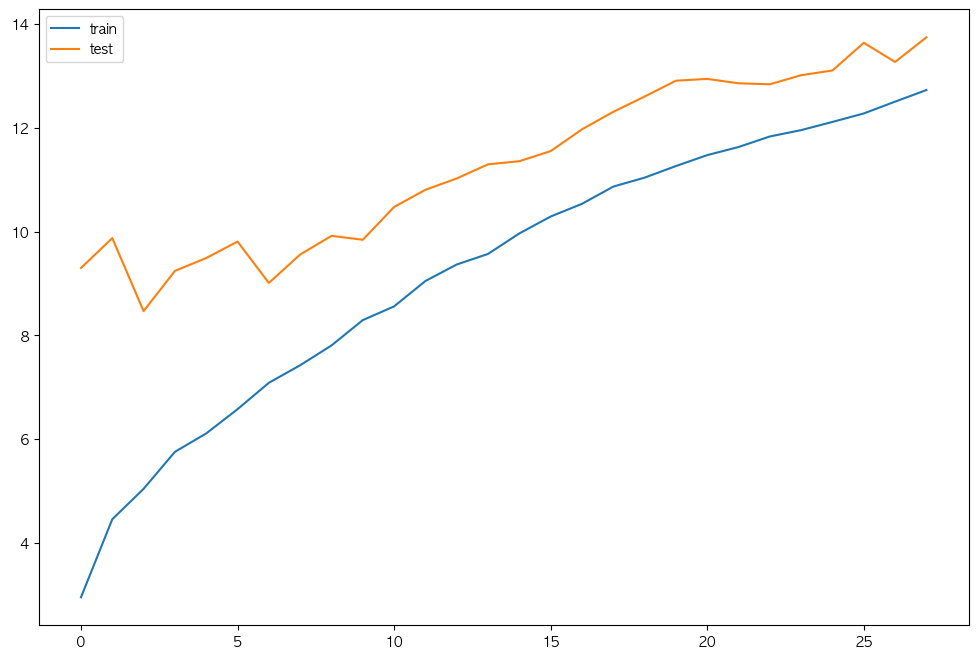

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse, label='train')
plt.plot(test_mse, label='test')
plt.legend()

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
import warnings

# 경고문구 없애기
warnings.filterwarnings('ignore')

# 파이프라인 재료 만들기
scaler = StandardScaler() #데이터 스케일링
knn = KNeighborsRegressor() #KNN Regressor

# 파이프라인 만들기
pipe = Pipeline([('scaler',scaler),('knn',knn)])

# 하이퍼패러미터 범주 지정
degree = range(1,19)
param_grid = {'knn__n_neighbors': degree}

# 교차검증 객체 지정
kfold = KFold(n_splits = 5, shuffle = True)

# GridSearchCV를 이용하여 하이퍼패러미터 튜닝
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    return_train_score=True    
)

#학습
grid_search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': range(1, 19)},
             return_train_score=True, scoring='neg_mean_squared_error')

In [16]:
import pandas as pd
df=pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004105,0.000496,0.002623,0.000385,1,{'knn__n_neighbors': 1},-9.574177,-11.600127,-6.069744,-10.071154,...,-10.689425,3.268567,14,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.003465,0.000202,0.002146,0.000183,2,{'knn__n_neighbors': 2},-6.865253,-10.168861,-5.519199,-8.452404,...,-9.245951,3.369730,7,-2.958299,-3.203458,-3.432763,-3.228240,-2.692699,-3.103092,0.254482
2,0.003157,0.000056,0.001980,0.000177,3,{'knn__n_neighbors': 3},-6.692405,-8.072616,-5.601838,-10.433803,...,-8.645494,2.486081,5,-5.205399,-4.573738,-5.175251,-4.403758,-3.556143,-4.582858,0.604118
3,0.002736,0.000191,0.001751,0.000134,4,{'knn__n_neighbors': 4},-6.421408,-7.919059,-5.230192,-8.856947,...,-7.960935,2.111949,1,-5.471232,-5.186266,-5.881984,-4.784986,-4.256654,-5.116225,0.559626
4,0.002704,0.000126,0.001662,0.000057,5,{'knn__n_neighbors': 5},-6.146942,-8.451362,-5.312303,-9.137713,...,-8.291536,2.496924,3,-6.080958,-5.545898,-6.585550,-5.334595,-4.823185,-5.674037,0.608610
5,0.003044,0.000191,0.001734,0.000071,6,{'knn__n_neighbors': 6},-6.711269,-8.364367,-4.446638,-9.323992,...,-8.238771,2.637779,2,-6.631080,-6.257342,-7.143777,-5.549386,-5.649905,-6.246298,0.599169
6,0.002669,0.000064,0.001792,0.000196,7,{'knn__n_neighbors': 7},-7.473451,-7.885172,-4.675636,-9.058577,...,-8.370116,2.623494,4,-7.080723,-6.631324,-7.626067,-6.130260,-6.207353,-6.735145,0.560070
7,0.002665,0.000085,0.001679,0.000061,8,{'knn__n_neighbors': 8},-8.297061,-8.445821,-5.324383,-9.537210,...,-9.042890,2.677413,6,-7.252755,-6.885300,-7.967205,-6.495196,-6.560674,-7.032226,0.539476
8,0.002711,0.000293,0.001660,0.000072,9,{'knn__n_neighbors': 9},-8.828128,-8.931652,-5.536616,-9.471684,...,-9.417859,2.817588,8,-7.867384,-7.362774,-8.345859,-7.094861,-6.926421,-7.519460,0.521635
9,0.002546,0.000130,0.001667,0.000078,10,{'knn__n_neighbors': 10},-8.820322,-8.997782,-5.803283,-9.419929,...,-9.482016,2.760056,9,-8.342733,-7.620174,-8.677061,-7.306885,-7.267665,-7.842903,0.568062


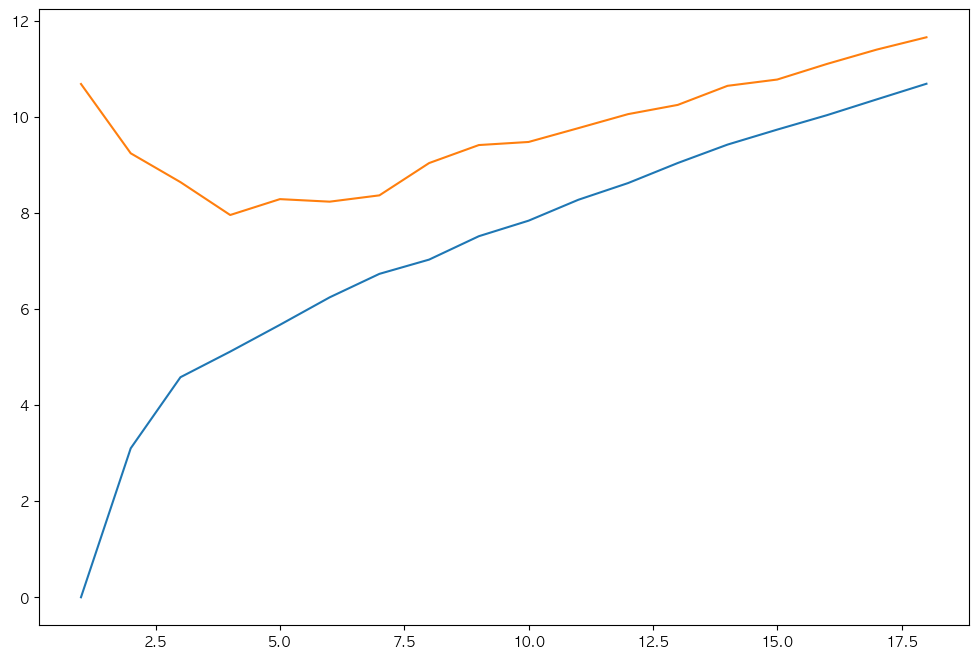

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(df['param_knn__n_neighbors'], -df['mean_train_score'])
plt.plot(df['param_knn__n_neighbors'], -df['mean_test_score'])

In [18]:
grid_search.best_params_, grid_search.best_score_

({'knn__n_neighbors': 4}, -7.960934700584225)